In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passmark = 40

In [6]:
df = pd.read_csv("StudentsPerformance.csv")

#### Print top five rows to show about data in columns.

In [52]:
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,T
1,female,group C,some college,standard,completed,69,90,88,P,P,T
2,female,group B,master's degree,standard,none,90,95,93,P,P,T
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,T
4,male,group C,some college,standard,none,76,78,75,P,P,T


In [53]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
995,female,group E,master's degree,standard,completed,88,99,95,P,P,T
996,male,group C,high school,free/reduced,none,62,55,55,P,P,T
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,T
998,female,group D,some college,standard,completed,68,78,77,P,P,T
999,female,group D,some college,free/reduced,none,77,86,86,P,P,T


#### Show size of dataset.

In [9]:
print (df.shape)

(1000, 8)


#### Basic information of the data

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Check any missing values

In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Math score

#### Number of students in each math scores

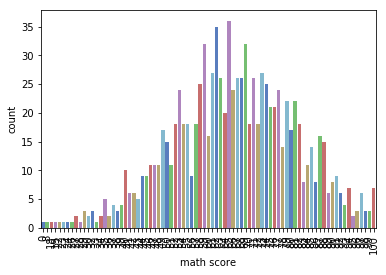

In [24]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.show()

#### Number of students  who passed in the Math exam (  > 40 )

In [19]:
df['Math_PassStatus'] = np.where(df['math score'] < passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

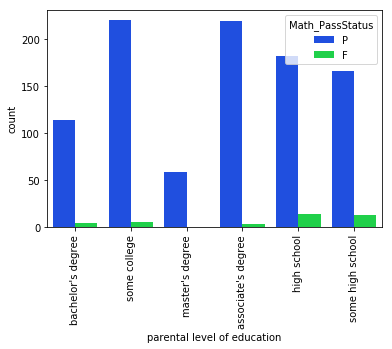

In [28]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

## Reading score

#### Number of students in each reading scores

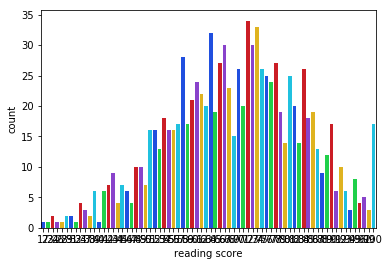

In [29]:
sns.countplot(x = "reading score", data = df, palette = "bright")
plt.show()

#### Student pass reading score

In [33]:
df['Reading_PassStatus'] = np.where(df['reading score'] < passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

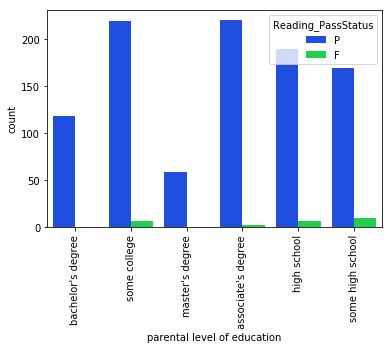

In [40]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation = 90)
plt.show()

## Writing score

#### Number of students in each writing score

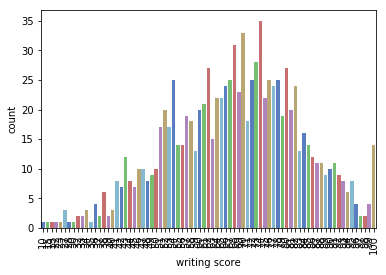

In [43]:
p = sns.countplot(x= "writing score", data = df, palette = "muted")
_ = plt.setp(p.get_xticklabels(), rotation = 90)
plt.show()

#### student pass writing

In [46]:
df['Writing_PassStatus'] = np.where(df['writing score'] >= passmark, 'T', 'F')
df.Writing_PassStatus.value_counts()

T    968
F     32
Name: Writing_PassStatus, dtype: int64

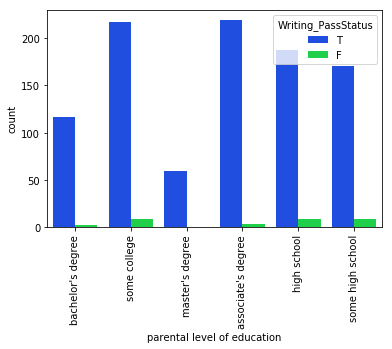

In [50]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 90)
plt.show()

## Check for students who passed in all the subjects

In [61]:
df['Overall_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F' 
                                                    or x['Writing_PassStatus'] == 'F' else 'P', axis = 1)

df.Overall_PassStatus.value_counts()

P    949
F     51
Name: Overall_PassStatus, dtype: int64

In [62]:
p = sns.countplot(x = 'parental level of education', data = df, hue='Overall_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 90)

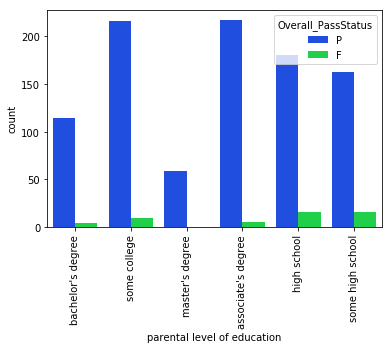

In [63]:
plt.show()

## Find Percentage of marks

In [71]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

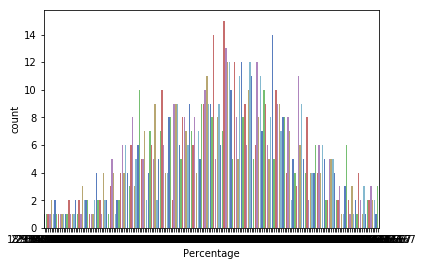

In [80]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation = 0)
plt.show()

## Assign the grades

    above 80 = A Grade
    70 - 80 = B Grade
    60 - 70 = C Grade
    50 - 60 = D Grade
    40 - 50 = E Grade
    Below 40 = F Grade ( Fail )


In [81]:
def GetGrade(Percentage, Overall_PassStatus):
    if(Overall_PassStatus == 'F'):
        return 'F'
    if(Percentage >= 80):
        return 'A'
    if(Percentage >= 70):
        return 'B'
    if(Percentage >= 60):
        return 'C'
    if(Percentage >= 50):
        return 'D'
    if(Percentage >= 40):
        return 'E'
    else:
        return 'F'

In [83]:
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['Overall_PassStatus']), axis=1)
df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

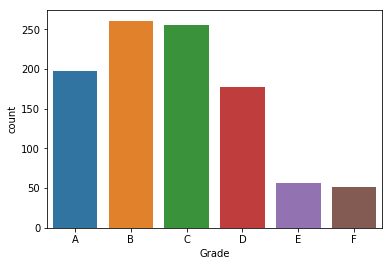

In [87]:
sns.countplot(x="Grade", data = df, order = ['A','B','C','D','E','F'])
plt.show()

In [88]:
p = sns.countplot(x = 'parental level of education', data = df, hue='Grade', palette= 'bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

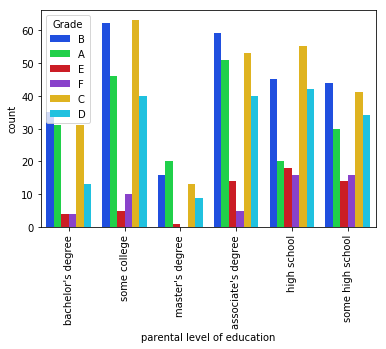

In [89]:
plt.show()

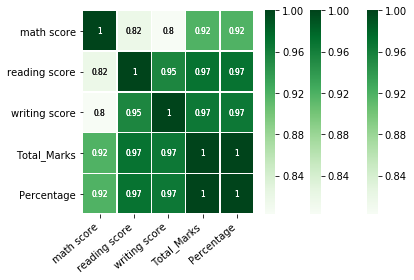

In [101]:
ax = sns.heatmap(df.corr(),cmap="Greens",annot=True,annot_kws={"size": 7.5},linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.tight_layout()
plt.show()